In [1]:
from MCTS import MCTS
from TSP import TSPGame
from NETS import RecurrentNN, create_training_set, ConvolutionalNN, GraphConvolutionalNN
from EVALUATE import evaluation_run, plot_comparison, create_comparison
from SELFPLAY import Coach
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class dotdict(dict):
    def __getattr__(self, name):
        return self[name]

In [3]:
num_node = 7
numAssess = 100
numEps = 300
validation_split = 0.2
numGens = 10
patience = 50

args = dotdict({
    # MCTS args
    'numMCTSSims': 500,        # Number of games moves for MCTS to simulate in self-play
    'num_node': num_node,              # Number of nodes in the graph (game)
    'cpuct': 1,
    
    # Self Play
    'numEps': numEps,
    'numAssess': numAssess,
    'numGens': numGens,
    'winThresh': 1.0           # 1 Thresh means replace on any total improvement

    })

rnn_args = dotdict({
    # State representation
    'history': True,           # Whether state representation should be a history of states - used for lstm
    'history_length': None,     # If None full history
    
    # NN args
    'lr': 0.001,
    'dropout': 0.3,
    'epochs': 300,
    'batch_size': 64,
    'validation_split': validation_split,
    'patience': patience
    })

cnn_args = dotdict({
    # State representation
    'history': False,           # Whether state representation should be a history of states - used for lstm
    
    # NN args
    'lr': 0.001,
    'dropout': 0.3,
    'epochs': 300,
    'batch_size': 64,
    'num_channels': 256,
    'validation_split': validation_split,
    'patience': patience
    })

gnn_args = dotdict({
    # State representation
    'history': False,           # Whether state representation should be a history of states - used for lstm
    
    # NN args
    'lr': 0.001,
    'epochs': 500,
    'batch_size': 64,
    'validation_split': validation_split,
    'patience': patience
    })

gnn_args.update(args)
cnn_args.update(args)
rnn_args.update(args)

In [ ]:
%%time

# Create a optimal dataset from 10000 games
dataset = create_training_set(gnn_args, 5000)

In [4]:
# Create RNN
rnn = RecurrentNN(rnn_args)
gnn = GraphConvolutionalNN(gnn_args)
cnn = ConvolutionalNN(cnn_args)

### Train

In [5]:
filename = '7node_5000sample'

In [16]:
%%time
rnn_hist = rnn.train(dataset)
rnn.save_model('rnn_'+filename)

Training...
Train on 14400 samples, validate on 3600 samples
Epoch 1/200
14400/14400 [==============================] - 14s 996us/step - loss: 2.1839 - pi_loss: 1.5144 - v_loss: 0.6694 - val_loss: 1.8459 - val_pi_loss: 1.1808 - val_v_loss: 0.6651
Epoch 2/200
14400/14400 [==============================] - 10s 676us/step - loss: 1.5266 - pi_loss: 1.2269 - v_loss: 0.2997 - val_loss: 1.1843 - val_pi_loss: 1.1210 - val_v_loss: 0.0633
Epoch 3/200
14400/14400 [==============================] - 10s 715us/step - loss: 1.2452 - pi_loss: 1.1788 - v_loss: 0.0664 - val_loss: 1.1802 - val_pi_loss: 1.1166 - val_v_loss: 0.0636
Epoch 4/200
14400/14400 [==============================] - 11s 771us/step - loss: 1.2188 - pi_loss: 1.1552 - v_loss: 0.0636 - val_loss: 1.1653 - val_pi_loss: 1.1113 - val_v_loss: 0.0540
Epoch 5/200
14400/14400 [==============================] - 10s 728us/step - loss: 1.1995 - pi_loss: 1.1384 - v_loss: 0.0611 - val_loss: 1.1557 - val_pi_loss: 1.1011 - val_v_loss: 0.0545
Epoch 6/2

Epoch 45/200
14400/14400 [==============================] - 12s 849us/step - loss: 1.0237 - pi_loss: 0.9746 - v_loss: 0.0492 - val_loss: 1.0189 - val_pi_loss: 0.9695 - val_v_loss: 0.0494
Epoch 46/200
14400/14400 [==============================] - 12s 856us/step - loss: 1.0150 - pi_loss: 0.9657 - v_loss: 0.0493 - val_loss: 1.0250 - val_pi_loss: 0.9751 - val_v_loss: 0.0499
Epoch 47/200
14400/14400 [==============================] - 13s 883us/step - loss: 1.0124 - pi_loss: 0.9633 - v_loss: 0.0491 - val_loss: 1.0073 - val_pi_loss: 0.9585 - val_v_loss: 0.0488
Epoch 48/200
14400/14400 [==============================] - 12s 854us/step - loss: 1.0099 - pi_loss: 0.9604 - v_loss: 0.0495 - val_loss: 1.0099 - val_pi_loss: 0.9611 - val_v_loss: 0.0488
Epoch 49/200
14400/14400 [==============================] - 12s 866us/step - loss: 1.0063 - pi_loss: 0.9565 - v_loss: 0.0499 - val_loss: 1.0129 - val_pi_loss: 0.9648 - val_v_loss: 0.0481
Epoch 50/200
14400/14400 [==============================] - 12s 8

14400/14400 [==============================] - 22s 2ms/step - loss: 0.8452 - pi_loss: 0.7975 - v_loss: 0.0476 - val_loss: 0.8757 - val_pi_loss: 0.8285 - val_v_loss: 0.0472
Epoch 90/200
14400/14400 [==============================] - 25s 2ms/step - loss: 0.8412 - pi_loss: 0.7935 - v_loss: 0.0477 - val_loss: 0.8656 - val_pi_loss: 0.8175 - val_v_loss: 0.0481
Epoch 91/200
14400/14400 [==============================] - 29s 2ms/step - loss: 0.8479 - pi_loss: 0.8001 - v_loss: 0.0477 - val_loss: 0.8618 - val_pi_loss: 0.8151 - val_v_loss: 0.0467
Epoch 92/200
14400/14400 [==============================] - 28s 2ms/step - loss: 0.8389 - pi_loss: 0.7914 - v_loss: 0.0475 - val_loss: 0.8652 - val_pi_loss: 0.8169 - val_v_loss: 0.0483
Epoch 93/200
14400/14400 [==============================] - 26s 2ms/step - loss: 0.8354 - pi_loss: 0.7873 - v_loss: 0.0480 - val_loss: 0.8664 - val_pi_loss: 0.8155 - val_v_loss: 0.0508
Epoch 94/200
14400/14400 [==============================] - 21s 1ms/step - loss: 0.8335 

14400/14400 [==============================] - 16s 1ms/step - loss: 0.7436 - pi_loss: 0.6971 - v_loss: 0.0465 - val_loss: 0.8203 - val_pi_loss: 0.7720 - val_v_loss: 0.0483
Epoch 134/200
14400/14400 [==============================] - 15s 1ms/step - loss: 0.7505 - pi_loss: 0.7044 - v_loss: 0.0461 - val_loss: 0.8183 - val_pi_loss: 0.7724 - val_v_loss: 0.0458
Epoch 135/200
14400/14400 [==============================] - 16s 1ms/step - loss: 0.7432 - pi_loss: 0.6967 - v_loss: 0.0465 - val_loss: 0.8226 - val_pi_loss: 0.7761 - val_v_loss: 0.0465
Epoch 136/200
14400/14400 [==============================] - 15s 1ms/step - loss: 0.7314 - pi_loss: 0.6848 - v_loss: 0.0466 - val_loss: 0.8112 - val_pi_loss: 0.7654 - val_v_loss: 0.0459
Epoch 137/200
14400/14400 [==============================] - 15s 1ms/step - loss: 0.7417 - pi_loss: 0.6953 - v_loss: 0.0464 - val_loss: 0.8179 - val_pi_loss: 0.7714 - val_v_loss: 0.0465
Epoch 138/200
14400/14400 [==============================] - 16s 1ms/step - loss: 0.

14400/14400 [==============================] - 16s 1ms/step - loss: 0.6676 - pi_loss: 0.6221 - v_loss: 0.0454 - val_loss: 0.8034 - val_pi_loss: 0.7552 - val_v_loss: 0.0482
Epoch 178/200
14400/14400 [==============================] - 17s 1ms/step - loss: 0.6679 - pi_loss: 0.6221 - v_loss: 0.0458 - val_loss: 0.8196 - val_pi_loss: 0.7733 - val_v_loss: 0.0463
Epoch 179/200
14400/14400 [==============================] - 15s 1ms/step - loss: 0.6670 - pi_loss: 0.6219 - v_loss: 0.0451 - val_loss: 0.8197 - val_pi_loss: 0.7740 - val_v_loss: 0.0458
Epoch 180/200
14400/14400 [==============================] - 16s 1ms/step - loss: 0.6679 - pi_loss: 0.6219 - v_loss: 0.0460 - val_loss: 0.8101 - val_pi_loss: 0.7639 - val_v_loss: 0.0462
Epoch 181/200
14400/14400 [==============================] - 15s 1ms/step - loss: 0.6598 - pi_loss: 0.6147 - v_loss: 0.0452 - val_loss: 0.8168 - val_pi_loss: 0.7687 - val_v_loss: 0.0481
Epoch 182/200
14400/14400 [==============================] - 16s 1ms/step - loss: 0.

In [17]:
%%time
gnn_losses = gnn.train(dataset)
gnn.save_model('gnn_'+filename)

/Users/TZilkha/anaconda3/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/TZilkha/anaconda3/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10/200
Epoch 20/200
Epoch 30/200
Epoch 40/200
Epoch 50/200
Epoch 60/200
Epoch 70/200
Epoch 80/200
Epoch 90/200
Epoch 100/200
Epoch 110/200
Epoch 120/200
Epoch 130/200
Epoch 140/200
Epoch 150/200
Epoch 160/200
Epoch 170/200
Epoch 180/200
Epoch 190/200
Epoch 200/200
CPU times: user 2h 55min 48s, sys: 1min 38s, total: 2h 57min 26s
Wall time: 2h 59min 5s


In [7]:
%%time
cnn_hist = cnn.train(dataset)
cnn.save_model('cnn_'+filename)

Training...
Train on 14400 samples, validate on 3600 samples
Epoch 1/200
14400/14400 [==============================] - 154s 11ms/step - loss: 1.8684 - pi_loss: 1.2856 - v_loss: 0.5828 - val_loss: 2.3876 - val_pi_loss: 1.7115 - val_v_loss: 0.6761
Epoch 2/200
14400/14400 [==============================] - 151s 10ms/step - loss: 1.4223 - pi_loss: 1.1669 - v_loss: 0.2554 - val_loss: 1.6237 - val_pi_loss: 1.4597 - val_v_loss: 0.1640
Epoch 3/200
14400/14400 [==============================] - 150s 10ms/step - loss: 1.2230 - pi_loss: 1.1177 - v_loss: 0.1053 - val_loss: 1.2156 - val_pi_loss: 1.0996 - val_v_loss: 0.1160
Epoch 4/200
14400/14400 [==============================] - 150s 10ms/step - loss: 1.1345 - pi_loss: 1.0631 - v_loss: 0.0714 - val_loss: 1.0799 - val_pi_loss: 1.0104 - val_v_loss: 0.0694
Epoch 5/200
14400/14400 [==============================] - 149s 10ms/step - loss: 1.0600 - pi_loss: 0.9986 - v_loss: 0.0614 - val_loss: 1.0280 - val_pi_loss: 0.9739 - val_v_loss: 0.0541
Epoch 6/2

In [6]:
rnn.load_model("rnn_"+filename)
gnn.load_model("gnn_"+filename)
cnn.load_model('cnn_'+filename)

Loaded model from disk
Loaded model from disk
Loaded model from disk


In [ ]:
def plot_training(history):
    # Plot training & validation v loss values
    plt.plot(history['v_loss'])
    plt.plot(history['val_v_loss'])
    plt.title('v Training Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['v', 'val_v'])
    plt.show()

    # Plot training & validation pi loss values
    plt.plot(history['pi_loss'])
    plt.plot(history['val_pi_loss'])
    plt.title('pi Training Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['pi', 'val_pi'])
    plt.show()

In [18]:
plot_training(rnn_hist.history)

Saved model to disk


In [ ]:
plot_training(cnn_hist.history)

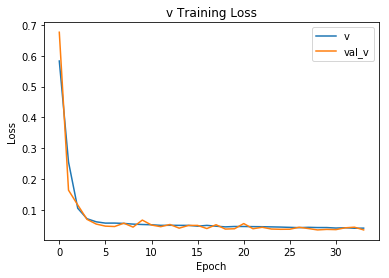

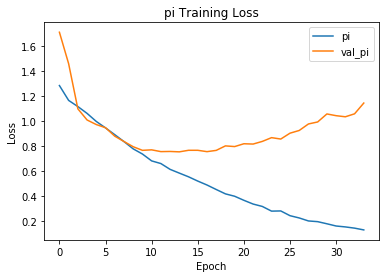

In [13]:
plot_training(gnn_hist)

### Evaluate

In [8]:
%%time

args['numMCTSSims']=2000

game_list = [TSPGame(args) for i in range(100)]

nets = {"No NN": None, 
        "LSTM": rnn,
        'GNN': gnn,
        'CNN': cnn}

res = create_comparison(game_list, nets, gnn_args)

0...1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...21...22...23...24...25...26...27...28...29...30...31...32...33...34...35...36...37...38...39...40...41...42...43...44...45...46...47...48...49...50...51...52...53...54...55...56...57...58...59...60...61...62...63...64...65...66...67...68...69...70...71...72...73...74...75...76...77...78...79...80...81...82...83...84...85...86...87...88...89...90...91...92...93...94...95...96...97...98...99...
CPU times: user 4min 52s, sys: 22.3 s, total: 5min 14s
Wall time: 4min 24s


In [ ]:
plot_comparison(res)

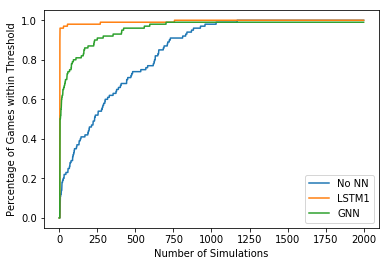

In [17]:
plot_comparison(res)

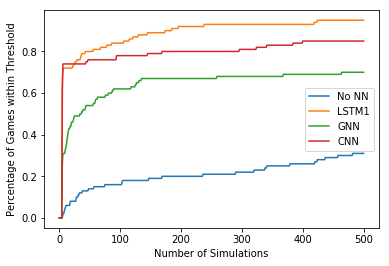

In [9]:
plot_comparison(res)